<a href="https://colab.research.google.com/github/bzizmza/Recommendation-System/blob/main/RecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System with content-based filtering techniques

## Data Understanding

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip

--2022-09-21 12:06:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39674 (39K) [application/x-httpd-php]
Saving to: ‘RCdata.zip’

RCdata.zip          100%[===================>]  38.74K   218KB/s    in 0.2s    

2022-09-21 12:06:09 (218 KB/s) - ‘RCdata.zip’ saved [39674/39674]



In [2]:
!unzip /content/RCdata.zip

Archive:  /content/RCdata.zip
  inflating: chefmozaccepts.csv      
  inflating: chefmozcuisine.csv      
  inflating: chefmozhours4.csv       
  inflating: chefmozparking.csv      
  inflating: geoplaces2.csv          
  inflating: rating_final.csv        
  inflating: README                  
  inflating: usercuisine.csv         
  inflating: userpayment.csv         
  inflating: userprofile.csv         


In [3]:
import pandas as pd
 
accepts = pd.read_csv('/content/chefmozaccepts.csv')
cuisine = pd.read_csv('/content/chefmozcuisine.csv')
hours = pd.read_csv('/content/chefmozhours4.csv')
parking = pd.read_csv('/content/chefmozparking.csv')
geo = pd.read_csv('/content/geoplaces2.csv', encoding = "ISO-8859-1")
usercuisine = pd.read_csv('/content/usercuisine.csv')
payment = pd.read_csv('/content/userpayment.csv')
profile = pd.read_csv('/content/userprofile.csv')
rating = pd.read_csv('/content/rating_final.csv')
 
print('Amount of payment received by restaurant : ', len(accepts.placeID.unique()))
print('Number of dishes in restaurant \t\t : ', len(cuisine.placeID.unique()))
print('Amount of restaurant opening time \t :  ', len(hours.placeID.unique()))
print('Amount of restaurant location data \t : ', len(geo.placeID.unique()))
print('Number of user cooking data \t\t : ', len(usercuisine.userID.unique()))
print('Number of user profile data \t\t : ', len(profile.userID.unique()))
print('Total user rating data \t\t\t : ', len(rating.userID.unique()))
print('Amount of restaurant rating data \t : ', len(rating.placeID.unique()))

Amount of payment received by restaurant :  615
Number of dishes in restaurant 		 :  769
Amount of restaurant opening time 	 :   694
Amount of restaurant location data 	 :  130
Number of user cooking data 		 :  138
Number of user profile data 		 :  138
Total user rating data 			 :  138
Amount of restaurant rating data 	 :  130


## Univariate Exploratory Data Analysis

In [4]:
accepts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   1314 non-null   int64 
 1   Rpayment  1314 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB


In [5]:
print('Many of Data: ', len(accepts.placeID.unique()))
print('Accepted Payment Types: ', accepts.Rpayment.unique())

Many of Data:  615
Accepted Payment Types:  ['cash' 'VISA' 'MasterCard-Eurocard' 'American_Express' 'bank_debit_cards'
 'checks' 'Discover' 'Carte_Blanche' 'Diners_Club' 'Visa'
 'Japan_Credit_Bureau' 'gift_certificates']


In [6]:
cuisine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   placeID   916 non-null    int64 
 1   Rcuisine  916 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [7]:
print('Many types of food: ', len(cuisine.Rcuisine.unique()))
print('Cooking tape: ', cuisine.Rcuisine.unique())

Many types of food:  59
Cooking tape:  ['Spanish' 'Italian' 'Latin_American' 'Mexican' 'Fast_Food' 'Burgers'
 'Dessert-Ice_Cream' 'Hot_Dogs' 'Steaks' 'Asian' 'International'
 'Mongolian' 'Vegetarian' 'Brazilian' 'Cafe-Coffee_Shop' 'Cafeteria'
 'Contemporary' 'Deli-Sandwiches' 'Diner' 'Japanese' 'Sushi' 'Seafood'
 'Chinese' 'Bar' 'Bar_Pub_Brewery' 'Pizzeria' 'Mediterranean' 'American'
 'Family' 'Caribbean' 'African' 'Breakfast-Brunch' 'Regional' 'Afghan'
 'Bakery' 'Game' 'Armenian' 'Vietnamese' 'Korean' 'Thai' 'Barbecue'
 'Polish' 'Dutch-Belgian' 'French' 'German' 'Southwestern' 'Persian'
 'Ethiopian' 'Juice' 'Soup' 'Continental-European' 'Greek' 'Southern'
 'Eastern_European' 'California' 'Bagels' 'Turkish' 'Organic-Healthy'
 'Fine_Dining']


In [8]:
print(profile.shape)


(138, 19)


In [9]:
profile.head()


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [10]:
rating.head()


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [11]:
rating.describe()


,placeID,rating,food_rating,service_rating
count,1161.000000,1161.000000,1161.000000,1161.000000
mean,134192.041344,1.199828,1.215332,1.090439
std,1100.916275,0.773282,0.792294,0.790844
min,132560.000000,0.000000,0.000000,0.000000
25%,132856.000000,1.000000,1.000000,0.000000
50%,135030.000000,1.000000,1.000000,1.000000
75%,135059.000000,2.000000,2.000000,2.000000
max,135109.000000,2.000000,2.000000,2.000000


In [12]:
print('Number of userID: ', len(rating.userID.unique()))
print('Number of placeIDs: ', len(rating.placeID.unique()))
print('Total rating data: ', len(rating))

Number of userID:  138
Number of placeIDs:  130
Total rating data:  1161


## Data Preprocessing


In [13]:
import numpy as np
 
# Combine all placeIDs in the Restaurant category
resto_all = np.concatenate((
     accepts.placeID.unique(),
     cuisine.placeID.unique(),
     hours.placeID.unique(),
     parking.placeID.unique(),
     geo.placeID.unique()
))
 
# Sort data and delete the same data
resto_all = np.sort(np.unique(resto_all))
 
print('Number of restaurants based on placeID: ', len(resto_all))

Number of restaurants based on placeID:  938


In [14]:
# Merge all userID
user_all = np.concatenate((
     usercuisine.userID.unique(),
     payment.userID.unique(),
     profile.userID.unique()
))
 
# Delete the same data then sort it
user_all = np.sort(np.unique(user_all))
 
print('Number of users: ', len(user_all))

Number of users:  138


In [15]:
# Merge accepts, geo, parking, hours files into the resto_info . dataframe
resto_info = pd.concat([accepts, geo, parking, hours])
 
# Combine rating dataframe with resto_info based on placeID value
resto = pd.merge(rating, resto_info , on='placeID', how='left')
resto

,userID,placeID,rating,food_rating,service_rating,Rpayment,latitude,longitude,the_geom_meter,name,...,accessibility,price,url,Rambience,franchise,area,other_services,parking_lot,hours,days
0,U1077,135085,2,2,2,cash,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U1077,135085,2,2,2,NaN,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,no_accessibility,medium,?,familiar,f,closed,none,NaN,NaN,NaN
2,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public,NaN,NaN
3,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Mon;Tue;Wed;Thu;Fri;
4,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Sat;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,U1068,132660,0,0,0,NaN,23.752943,-99.164679,0101000020957F00003D7905C9DC8157C13FCD1AB7334E...,carnitas mata calle Emilio Portes Gil,...,completely,low,?,familiar,f,closed,none,NaN,NaN,NaN
8074,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN
8075,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
8076,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Sat;


In [16]:
# Check for missing values with isnull() function
resto.isnull().sum()

userID               0
placeID              0
rating               0
food_rating          0
service_rating       0
Rpayment          5781
latitude          6917
longitude         6917
the_geom_meter    6917
name              6917
address           6917
city              6917
state             6917
country           6917
fax               6917
zip               6917
alcohol           6917
smoking_area      6917
dress_code        6917
accessibility     6917
price             6917
url               6917
Rambience         6917
franchise         6917
area              6917
other_services    6917
parking_lot       6917
hours             4619
days              4619
dtype: int64

In [17]:
# Calculate the number of ratings, food_rating, and service then combine them based on placeID
resto.groupby('placeID').sum()

,rating,food_rating,service_rating,latitude,longitude
placeID,,,,,
132560,12,24,6,95.009216,-396.667653
132561,15,20,20,94.907276,-396.506024
132564,25,25,30,94.923698,-396.580739
132572,90,90,84,332.124707,-1514.890677
132583,24,24,30,75.689162,-396.937328
...,...,...,...,...,...
135088,36,42,36,113.256068,-595.319338
135104,48,80,48,166.270875,-694.179039
135106,96,96,96,221.497088,-1009.760928


In [18]:
# Define rating dataframe into variable all_resto_rate
all_resto_rate = rating
all_resto_rate

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [19]:
# Combine all resto_rate with geo dataframe based on placeID
all_resto_name = pd.merge(all_resto_rate, geo[['placeID','name']], on='placeID', how='left')
 
# Print dataframe all_resto_name
all_resto_name

,userID,placeID,rating,food_rating,service_rating,name
0,U1077,135085,2,2,2,Tortas Locas Hipocampo
1,U1077,135038,2,2,1,Restaurant la Chalita
2,U1077,132825,2,2,2,puesto de tacos
3,U1077,135060,1,2,2,Restaurante Marisco Sam
4,U1068,135104,1,1,2,vips
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,palomo tec
1157,U1011,132715,1,1,0,tacos de la estacion
1158,U1068,132733,1,1,0,Little Cesarz
1159,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec


In [20]:
# Combine dataframe cuisine with all_resto_name and put it in the variable all_resto
all_resto = pd.merge(all_resto_name, cuisine, on='placeID', how='left')
all_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
1,U1077,135038,2,2,1,Restaurant la Chalita,NaN
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
...,...,...,...,...,...,...,...
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican


## Data Preparation


In [21]:
# Check for missing values in the all_resto dataframe
all_resto.isnull().sum()

userID              0
placeID             0
rating              0
food_rating         0
service_rating      0
name                0
Rcuisine          288
dtype: int64

In [22]:
# Cleaning missing values with dropna() function
all_resto_clean = all_resto.dropna()
all_resto_clean

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
5,U1068,132740,0,0,0,Carreton de Flautas y Migadas,Mexican
...,...,...,...,...,...,...,...
1325,U1043,132732,1,1,1,Taqueria EL amigo,Mexican
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria


In [23]:
# Check again for missing value on variable all_resto_clean
all_resto_clean.isnull().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
name              0
Rcuisine          0
dtype: int64

In [24]:
# Sort restaurants by PlaceID then put them in the variable fix_resto
fix_resto = all_resto_clean.sort_values('placeID', ascending=True)
fix_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
438,U1024,135106,1,1,1,El Rincón de San Francisco,Mexican
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian
99,U1030,135109,0,0,0,Paniroles,Italian


In [25]:
# Check how many fix_resto
len(fix_resto.placeID.unique())

95

In [26]:
# Check the category of unique dishes
fix_resto.Rcuisine.unique()

array(['Regional', 'Cafeteria', 'American', 'Mexican', 'Fast_Food',
       'Italian', 'Armenian', 'Pizzeria', 'Japanese', 'Vietnamese',
       'Family', 'International', 'Game', 'Burgers', 'Bakery', 'Bar',
       'Breakfast-Brunch', 'Bar_Pub_Brewery', 'Mediterranean',
       'Cafe-Coffee_Shop', 'Contemporary', 'Seafood', 'Chinese'],
      dtype=object)

In [27]:
# Check the Game cooking category
fix_resto[fix_resto['Rcuisine'] == 'Game']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
509,U1052,132851,1,0,2,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
770,U1037,132851,2,2,1,KFC,Game
574,U1069,132851,1,0,0,KFC,Game
1188,U1131,132851,2,2,2,KFC,Game
764,U1111,132851,2,1,0,KFC,Game


In [28]:
# Check the category of cuisine in the name of the KFC restaurant
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,Game
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,Game


In [29]:
# Change the name of the cuisine category 'Game' to 'American'
fix_resto = fix_resto.replace('Game', 'American')
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,American
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,American
708,U1008,132851,1,1,1,KFC,American
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,American
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,American


In [30]:
# Create a preparation variable containing the fix_resto dataframe then sort by placeID
preparation = fix_resto
preparation.sort_values('placeID')

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
184,U1055,132572,2,2,2,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
1224,U1002,135106,1,1,1,El Rincón de San Francisco,Mexican
99,U1030,135109,0,0,0,Paniroles,Italian
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian


In [31]:
# Remove duplicate data on the preparation variable
preparation = preparation.drop_duplicates('placeID')
preparation

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
168,U1118,132583,0,0,0,McDonalds Centro,American
24,U1107,132584,2,2,2,Gorditas Dona Tota,Mexican
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...,...,...,...,...
681,U1095,135086,1,2,1,Mcdonalds Parque Tangamanga,Fast_Food
175,U1020,135088,1,2,0,Cafeteria cenidet,Cafeteria
4,U1068,135104,1,1,2,vips,Mexican
488,U1004,135106,2,2,2,El Rincón de San Francisco,Mexican


In [32]:
# Convert the data series 'placeID' to be in the form of a list
resto_id = preparation['placeID'].tolist()
 
# Convert the data series 'Name' to be in the form of a list
resto_name = preparation['name'].tolist()
 
# Convert the data series 'Rcuisine' to be in the form of a list
resto_cuisine = preparation['Rcuisine'].tolist()
 
print(len(resto_id))
print(len(resto_name))
print(len(resto_cuisine))

95
95
95


In [33]:
# Create a dictionary for data 'resto_id', 'resto_name', and 'cuisine'
resto_new = pd.DataFrame({
     'id': resto_id,
     'resto_name': resto_name,
     'cuisine': resto_cuisine
})
resto_new

,id,resto_name,cuisine
0,132560,puesto de gorditas,Regional
1,132572,Cafe Chaires,Cafeteria
2,132583,McDonalds Centro,American
3,132584,Gorditas Dona Tota,Mexican
4,132594,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...
90,135086,Mcdonalds Parque Tangamanga,Fast_Food
91,135088,Cafeteria cenidet,Cafeteria
92,135104,vips,Mexican
93,135106,El Rincón de San Francisco,Mexican


## Model Development with Content Based Filtering

In [34]:
data = resto_new
data.sample(5)

,id,resto_name,cuisine
12,132667,little pizza Emilio Portes Gil,Armenian
6,132609,Pollo_Frito_Buenos_Aires,Fast_Food
60,135027,Restaurant Orizatlan,Mexican
69,135043,pizza clasica,Fast_Food
84,135072,Sushi Itto,Japanese


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Initialize TfidfVectorizer
tf = TfidfVectorizer()
 
# Perform idf calculations on cuisine data
tf.fit(data['cuisine'])
 
# Mapping array from integer index feature to name feature
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['american',
 'armenian',
 'bar',
 'bar_pub_brewery',
 'breakfast',
 'brunch',
 'burgers',
 'cafe',
 'cafeteria',
 'chinese',
 'coffee_shop',
 'contemporary',
 'family',
 'fast_food',
 'international',
 'italian',
 'japanese',
 'mexican',
 'pizzeria',
 'regional',
 'seafood',
 'vietnamese']

In [36]:
# Perform fit then transformed to matrix form
tfidf_matrix = tf.fit_transform(data['cuisine'])
 
# View the size of the tfidf matrix
tfidf_matrix.shape

(95, 22)

In [37]:
# Convert tf-idf vector in matrix form with todense() function
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# Create a dataframe to view the tf-idf matrix
# The column is filled with the type of cuisine
# The line is filled with the name of the restaurant
 
pd.DataFrame(
     tfidf_matrix.todense(),
     columns=tf.get_feature_names(),
     index=data.resto_name
).sample(22, axis=1).sample(10, axis=0)

,chinese,fast_food,bar,family,brunch,contemporary,mexican,vietnamese,japanese,coffee_shop,...,bar_pub_brewery,burgers,pizzeria,italian,breakfast,cafe,seafood,american,regional,international
resto_name,,,,,,,,,,,,,,,,,,,,,
shi ro ie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tacos los volcanes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Restaurant Wu Zhuo Yi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
puesto de tacos,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
El Rincón de San Francisco,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
emilianos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
El Rincon de San Francisco,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Koye Sushi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
La Cantina Restaurante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Calculating cosine similarity on the tf-idf . matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [40]:
# Create a dataframe from the cosine_sim variable with rows and columns in the form of restaurant names
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['resto_name'], columns=data['resto_name'])
print('Shape:', cosine_sim_df.shape)
 
# See the similarity matrix in each restaurant
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (95, 95)


resto_name,Restaurante Tiberius,Luna Cafe,Tortas y hamburguesas el gordo,Sushi Itto,Unicols Pizza
resto_name,,,,,
La Fontana Pizza Restaurante and Cafe,1.0,0.0,0.0,0.0,0.0
Restaurant Bar Coty y Pablo,0.0,1.0,0.0,0.0,0.0
Log Yin,0.0,0.0,1.0,0.0,0.0
El Rincon de San Francisco,0.0,0.0,0.0,0.0,0.0
vips,0.0,0.0,0.0,0.0,0.0
Taqueria EL amigo,0.0,0.0,0.0,0.0,0.0
Gorditas Doa Gloria,0.0,0.0,0.0,0.0,0.0
La Posada del Virrey,0.0,0.0,0.0,0.0,0.0
La Cantina Restaurante,0.0,0.0,0.0,0.0,0.0


In [41]:
def resto_recommendations(resto_name, similarity_data=cosine_sim_df, items=data[['resto_name', 'cuisine']], k=5):
    """
    Resto recommendations based on dataframe similarity
 
    Parameter:
    ---
    name_resto : data type string (str)
                Restaurant Name (dataframe similarity index)
    similarity_data : data type pd.DataFrame (object)
                      Similar dataframe, symmetric, with resto as
                      index and column
    items : data type pd.DataFrame(object)
            Contains both names and other features used to define similarity
    k : data type integer (int)
        The number of recommendations given
    ---
 
 
    In this index, we take k with the greatest similarity value
    on the given index matrix (i).
    """
 
 
    # Retrieve data by using argpartition to partition indirectly along a given axis
    # Dataframe changed to numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,resto_name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Retrieve data with the greatest similarity from the existing index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop the name of the restaurant so that the name of the restaurant you are looking for does not appear in the list of recommendations
    closest = closest.drop(resto_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [42]:
data[data.resto_name.eq('KFC')]


,id,resto_name,cuisine
31,132851,KFC,American


In [43]:
# Get restaurant recommendations similar to KFC
resto_recommendations('KFC')


,resto_name,cuisine
0,VIPS,American
1,tacos los volcanes,American
2,Pizzeria Julios,American
3,Sirlone,International
4,McDonalds Centro,American


## Model Development with Collaborative Filtering

In [44]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [45]:
# Reading datasets
 
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [46]:
# Change userID to list without the same value
user_ids = df['userID'].unique().tolist()
print('list userID: ', user_ids)
 
# Encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Perform the process of encoding numbers to userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded number to userID: ', user_encoded_to_user)

list userID:  ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U10

In [47]:
# Change the placeID to a list without the same value
resto_ids = df['placeID'].unique().tolist()
 
# Perform the placeID encoding process
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}
 
# Perform the process of encoding numbers to placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

In [48]:
# Mapping userID to user dataframe
df['user'] = df['userID'].map(user_to_user_encoded)
 
# Mapping placeID to restaurant dataframe
df['resto'] = df['placeID'].map(resto_to_resto_encoded)

In [49]:
# Get the number of users
num_users = len(user_to_user_encoded)
print(num_users)
 
# Get the number of restaurants
num_resto = len(resto_encoded_to_resto)
print(num_resto)
 
# Change rating to float value
df['rating'] = df['rating'].values.astype(np.float32)
 
# Minimum rating value
min_rating = min(df['rating'])
 
# Maximum value rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Restaurant: {}, Min Rating: {}, Max Rating: {}'.format(
     num_users, num_resto, min_rating, max_rating
))

138
130
Number of User: 138, Number of Restaurant: 130, Min Rating: 0.0, Max Rating: 2.0


In [50]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42)
df

,userID,placeID,rating,food_rating,service_rating,user,resto
538,U1052,132870,1.0,1,1,63,116
673,U1015,132869,2.0,2,2,11,115
578,U1047,132875,0.0,0,0,78,117
242,U1056,135076,2.0,2,2,41,71
1063,U1002,135106,1.0,1,1,125,64
...,...,...,...,...,...,...,...
1044,U1073,135065,0.0,0,0,123,94
1095,U1058,135062,2.0,2,2,124,76
1130,U1087,132660,1.0,1,0,132,14
860,U1029,132937,1.0,1,1,110,126


In [51]:
# Create a variable x to match user and restaurant data into one value
x = df[['user', 'resto']].values
 
# Create a variable y to make a rating of the results
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Split into 80% train data and 20% validation data
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
     x[:train_indices],
     x[train_indices:],
     y[:train_indices],
     y[train_indices:]
)
 
print(x,y)

[[ 63 116]
 [ 11 115]
 [ 78 117]
 ...
 [132  14]
 [110 126]
 [129   6]] [0.5 1.  0.  ... 0.5 0.5 0. ]


## Training Process

In [52]:
class RecommenderNet(tf.keras.Model):
 
  # Initialize function
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # call embedding layer 1
    user_bias = self.user_bias(inputs[:, 0]) # call embedding layer 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # call embedding layer 3
    resto_bias = self.resto_bias(inputs[:, 1]) # call embedding layer 4
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [53]:
model = RecommenderNet(num_users, num_resto, 50) # initialize model
 
# model compile
model.compile(
     loss = tf.keras.losses.BinaryCrossentropy(),
     optimizer = keras.optimizers.Adam(learning_rate=0.001),
     metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [54]:
# Start training
 
history = model.fit(
     x = x_train,
     y = y_train,
     batch_size = 8,
     epochs = 100,
     validation_data = (x_val, y_val)
)

Epoch 1/100
116/116 [==============================] - 7s 14ms/step - loss: 0.7007 - root_mean_squared_error: 0.4031 - val_loss: 0.6824 - val_root_mean_squared_error: 0.3944
Epoch 2/100
116/116 [==============================] - 1s 7ms/step - loss: 0.6707 - root_mean_squared_error: 0.3844 - val_loss: 0.6791 - val_root_mean_squared_error: 0.3923
Epoch 3/100
116/116 [==============================] - 1s 5ms/step - loss: 0.6619 - root_mean_squared_error: 0.3789 - val_loss: 0.6766 - val_root_mean_squared_error: 0.3907
Epoch 4/100
116/116 [==============================] - 1s 7ms/step - loss: 0.6484 - root_mean_squared_error: 0.3704 - val_loss: 0.6724 - val_root_mean_squared_error: 0.3880
Epoch 5/100
116/116 [==============================] - 1s 8ms/step - loss: 0.6423 - root_mean_squared_error: 0.3663 - val_loss: 0.6688 - val_root_mean_squared_error: 0.3857
Epoch 6/100
116/116 [==============================] - 1s 6ms/step - loss: 0.6380 - root_mean_squared_error: 0.3636 - val_loss: 0.6656

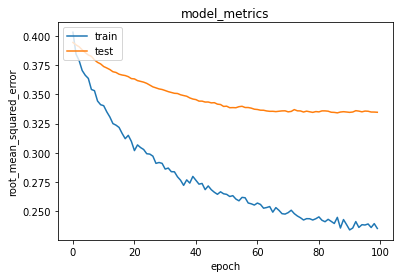

In [55]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
resto_df = resto_new
df = pd.read_csv('rating_final.csv')
 
# Taking user samples
user_id = df.userID.sample(1).iloc[0]
resto_visited_by_user = df[df.userID == user_id]
 
# Bitwise operator (~), can be found here https://docs.python.org/3/reference/expressions.html
resto_not_visited = resto_df[~resto_df['id'].isin(resto_visited_by_user.placeID.values)]['id']
resto_not_visited = list(
     set(resto_not_visited)
     .intersection(set(resto_to_resto_encoded.keys()))
)
 
resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
     ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [57]:
ratings = model.predict(user_resto_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
     resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)
 
top_resto_user = (
     resto_visited_by_user.sort_values(
         by = 'rating',
         ascending=False
     )
     .head(5)
     .placeID.values
)
 
resto_df_rows = resto_df[resto_df['id'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
     print(row.resto_name, ':', row.cuisine)
 
print('----' * 8)
print('Top 10 recommended restaurants')
print('----' * 8)
 
recommended_resto = resto_df[resto_df['id'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
     print(row.resto_name, ':', row.cuisine)

Showing recommendations for users: U1087
Resto with high ratings from user
--------------------------------
little pizza Emilio Portes Gil : Armenian
Taqueria EL amigo  : Mexican
Carreton de Flautas y Migadas : Mexican
vips : Mexican
--------------------------------
Top 10 recommended restaurants
--------------------------------
La Estrella de Dimas : Mexican
cafe punta del cielo : Cafeteria
emilianos : Bar_Pub_Brewery
Restaurant Las Mananitas : International
Kiku Cuernavaca : Japanese
El Oceano Dorado : Mexican
El Rincon de San Francisco : Mexican
La Virreina : Mexican
Preambulo Wifi Zone Cafe : Cafe-Coffee_Shop
Michiko Restaurant Japones : Japanese
